<a href="https://colab.research.google.com/github/posili/Modulabs_MainProject4/blob/master/Step02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 동일한 테이블 사용하므로 병합 과정 생략

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brazilian E-Commerce Public Dataset/eng_ver.csv')

#원본 백업
df_origin = df.copy()

In [3]:
#전체 컬럼 보기 설정
pd.set_option('display.max_columns', None)
#필수 컬럼만 남김
df = df[['order_id', 'customer_unique_id', 'product_id', 'order_item_id', 'product_category_name_english']]
#컬럼명 변경
df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               113425 non-null  object 
 1   customer_unique_id     113425 non-null  object 
 2   product_id             112650 non-null  object 
 3   order_item_id          112650 non-null  float64
 4   product_category_name  111023 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.3+ MB


<ipython-input-3-f9d4c728b2f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)


## 결측치

In [4]:
df.isna().sum()

,0
order_id,0
customer_unique_id,0
product_id,775
order_item_id,775
product_category_name,2402


In [5]:
df.isna().mean()

,0
order_id,0.000000
customer_unique_id,0.000000
product_id,0.006833
order_item_id,0.006833
product_category_name,0.021177


In [6]:
df[df['product_category_name'].isna()]

,order_id,customer_unique_id,product_id,order_item_id,product_category_name
7,1093c8304c7a003280dd34598194913d,57b2a98a409812fe9618067b6b8ebe4f,124f74f703e88efe001a10bfa718b6ff,1.0,NaN
50,6e98de3a85c84ead6689189b825d35b5,233896de79986082f1f479f1f85281cb,NaN,NaN,NaN
90,cc07a8fdd3a8e94d683c8142a117dbc1,e5dbefdfdf3eff75c8e6cd655f128279,5a848e4ab52fd5445cdc07aab1c40e48,1.0,NaN
174,f51e3c7f79d1e2c076acbb6af1588b95,755bdc2822a8f01cfcec19ae4dcaae66,e1da02256dce4dee2207c36853547c7b,1.0,NaN
330,df8c077268f7f3baaac0892eb3143642,0071f46a072a9ae25bbe4438b15efe9c,NaN,NaN,NaN
...,...,...,...,...,...
113045,9b932dca249f9971b86dde2f2d7ad412,639b4096a4e5c96549a9bb495ca4871e,NaN,NaN,NaN
113091,d08257023bba46fdf7e3cfcccac606b8,74ec77145a467b1a96152aac1c3ab137,cf951c39ef0ca44ee11278e4ece167d1,1.0,NaN
113092,d08257023bba46fdf7e3cfcccac606b8,74ec77145a467b1a96152aac1c3ab137,cf951c39ef0ca44ee11278e4ece167d1,2.0,NaN
113184,a1fa82769a203e30b8faf81cd32e5193,6d443b75cff956bb73dce7385033e266,24aba57735be13fd785bc04d1a8812e4,2.0,NaN


임의로 채우면 오히려 노이즈가 발생할 확률이 높다고 판단, 제거해도 치명적인 데이터 양이 아니라 drop 결정

In [7]:
product_category_name_nan = df[df['product_category_name'].isna()].index
product_id_nan = df[df['product_id'].isna()].index
order_item_id_nan = df[df['order_item_id'].isna()].index

In [8]:
len(df)

113425

In [9]:
df.dropna()

,order_id,customer_unique_id,product_id,order_item_id,product_category_name
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,1.0,office_furniture
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,4aa6014eceb682077f9dc4bffebc05b0,1.0,housewares
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,bd07b66896d6f1494f5b86251848ced7,1.0,office_furniture
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,a5647c44af977b148e0a3a4751a09e2e,1.0,office_furniture
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,9391a573abe00141c56e38d84d7d5b3b,1.0,home_confort
...,...,...,...,...,...
113420,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,ccb4503d9d43d245d3b295d0544f988b,1.0,books_general_interest
113421,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,9ede6b0570a75a4b9de4f383329f99ee,1.0,sports_leisure
113422,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,7a5d2e1e131a860ae7d18f6fffa9d689,1.0,health_beauty
113423,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,f819f0c84a64f02d3a5606ca95edd272,1.0,watches_gifts


## 재구매율 구하기
→ 전체 고객 중, 특정 카테고리를 한 번 이상 반복 구매한 고객의 비율

In [10]:
#고객별로 구매한 카테고리 개수 계산
customer_category_counts = df.groupby(['customer_unique_id', 'product_category_name']).size().reset_index(name='purchase_count')
customer_category_counts

,customer_unique_id,product_category_name,purchase_count
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,1
2,0000f46a3911fa3c0805444483337064,stationery,1
3,0000f6ccb0745a6a4b88665a16c9f078,telephony,1
4,0004aac84e0df4da2b147fca70cf8255,telephony,1
...,...,...,...
96443,fffcf5a5ff07b0908bd4e2dbc735a684,health_beauty,2
96444,fffea47cd6d3cc0a88bd621562a9d061,baby,1
96445,ffff371b4d645b6ecea244b27531430a,auto,1
96446,ffff5962728ec6157033ef9805bacc48,watches_gifts,1


In [11]:
#구매 횟수가 2회 이상인 경우
repeat_purchases = customer_category_counts[customer_category_counts['purchase_count'] > 1]
repeat_purchases

,customer_unique_id,product_category_name,purchase_count
7,00053a61a98854899e70ed204dd4bafe,sports_leisure,2
18,000de6019bb59f34c099a907c151d855,bed_bath_table,2
22,000fbf0473c10fc1ab6f8d2d286ce20c,musical_instruments,2
23,000fbf0473c10fc1ab6f8d2d286ce20c,toys,2
26,001147e649a7b1afd577e873841632dd,housewares,2
...,...,...,...
96416,ffe96201d466b0e0dc8139850be29d5d,construction_tools_lights,2
96432,fff22793223fe80c97a8fd02ac5c6295,perfumery,3
96436,fff5eb4918b2bf4b2da476788d42051c,signaling_and_security,6
96438,fff7219c86179ca6441b8f37823ba3d3,bed_bath_table,2


In [12]:
#재구매 고객 수
repeat_customer_count = repeat_purchases['customer_unique_id'].nunique()
repeat_customer_count

10037

In [13]:
#전체 고객 수
total_customers = df['customer_unique_id'].nunique()
total_customers

96096

In [14]:
#재구매율
repeat_purchase_rate = repeat_customer_count / total_customers
print(repeat_purchase_rate)
round(repeat_purchase_rate*100,2)

0.1044476356976357


10.44

## 카테고리별 재구매율 확인
### 목적
어떤 제품군이 재구매가 활발한지 분석하여 **전략 수립** 가능 \
### 방법
각 product_category_name별로 고객이 동일한 카테고리를 다시 구매한 비율을 계산

In [15]:
# 각 카테고리별 고객의 구매 횟수 계산
category_repeat_counts = df.groupby(['product_category_name', 'customer_unique_id']).size().reset_index(name='purchase_count')

# 각 카테고리에서 재구매한 고객 수 계산
category_repurchase = category_repeat_counts[category_repeat_counts['purchase_count'] > 1]
category_repurchase_rate = (
    category_repurchase.groupby('product_category_name')['customer_unique_id'].nunique()
    / category_repeat_counts.groupby('product_category_name')['customer_unique_id'].nunique()
) * 100

# 특정 카테고리만 필터링(bed_bath_table을 제외한 Step01의 TOP5 카테고리)
selected_categories = ['furniture_decor', 'health_beauty', 'sports_leisure', 'computers_accessories']
filtered_repurchase_rate = category_repurchase_rate[category_repurchase_rate.index.isin(selected_categories)]
filtered_repurchase_rate

,customer_unique_id
product_category_name,
computers_accessories,12.322709
furniture_decor,20.531898
health_beauty,8.504264
sports_leisure,11.350632


<ipython-input-16-e8876a30ca6e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=filtered_repurchase_rate.values, y=filtered_repurchase_rate.index, palette="viridis")


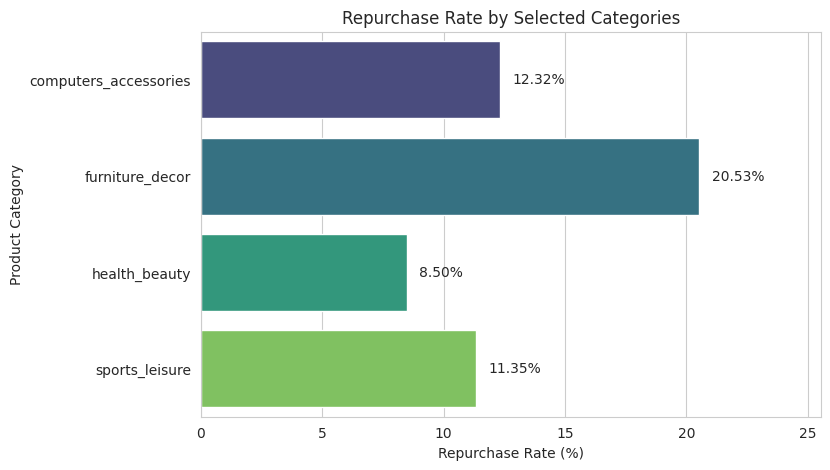

In [16]:
# Seaborn을 활용한 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=filtered_repurchase_rate.values, y=filtered_repurchase_rate.index, palette="viridis")

# 레이블 추가
plt.xlabel("Repurchase Rate (%)")
plt.ylabel("Product Category")
plt.title("Repurchase Rate by Selected Categories")

# 수치 정확하게 표시
for index, value in enumerate(filtered_repurchase_rate):
    ax.text(value + 0.5, index, f"{value:.2f}%", va='center', fontsize=10)

plt.xlim(0, max(filtered_repurchase_rate) + 5)
plt.show()


→ 가장 재구매율이 높은 것은 **furniture_decor**로 확인.

## 통계적 검증
고객이 동일 카테고리를 반복 구매할 확률이 무작위보다 높은지 검정하고자 함.

### 카이제곱검정
→ 고객의 재구매 여부는 범주형 데이터이므로 두 변수가 서로 독립적인지 확인
- **변수 1:** 고객이 특정 카테고리를 재구매했는가? (Yes / No)
- **변수 2:** 제품 카테고리 \


- **귀무가설 (H₀):** 고객이 과거에 구매한 카테고리를 다시 구매하는 것은 **랜덤**이다.
    
    → 고객이 이전에 구매한 카테고리와 관계없이 아무 카테고리나 다시 구매할 가능성이 동일하다.
    
- **대립가설 (H₁):** 고객은 과거에 구매한 카테고리를 다시 구매할 가능성이 **유의미하다.**
    
    → 특정 카테고리를 한 번 구매한 고객은 다시 같은 카테고리를 구매하는 경향이 있다.
        
따라서 p-value가 0.05보다 작다면 **"고객이 과거에 구매한 카테고리를 다시 구매하는 경향이 있다"**고 판단할 수 있다.

In [17]:
from scipy.stats import chi2_contingency

# 재구매 여부를 나타내는 컬럼 추가
df['repeat_purchase'] = df.duplicated(subset=['customer_unique_id', 'product_category_name'], keep=False)

# 교차표 생성
contingency_table = pd.crosstab(df['repeat_purchase'], df['product_category_name'])

# 카이제곱 검정 실행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# 유의 수준 0.05 기준 검정 결과 해석
if p < 0.05:
    print("과거에 구매한 적 있는 카테고리에서 재구매할 가능성이 유의미하게 높음.")
else:
    print("우연적 결과.")


Chi-square statistic: 5183.011154437786
P-value: 0.0
과거에 구매한 적 있는 카테고리에서 재구매할 가능성이 유의미하게 높음.


In [18]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Brazilian E-Commerce Public Dataset/Step02.csv", index=False)